In [1]:
protein = "MAHVRGLQLPGCLALAALCSLVHSQHVFLAPQQARSLLQRVRRANTFLEEVRKGNLERECVEETCSYEEAFEALESSTATDVFWAKYTACETARTPRDKLAACLEGNCAEGLGTNYRGHVNITRSGIECQLWRSRYPHKPEINSTTHPGADLQENFCRNPDSSTTGPWCYTTDPTVRRQECSIPVCGQDQVTVAMTPRSEGSSVNLSPPLEQCVPDRGQQYQGRLAVTTHGLPCLAWASAQAKALSKHQDFNSAVQLVENFCRNPDGDEEGVWCYVAGKPGDFGYCDLNYCEEAVEEETGDGLDEDSDRAIEGRTATSEYQTFFNPRTFGSGEADCGLRPLFEKKSLEDKTERELLESYIDGRIVEGSDAEIGMSPWQVMLFRKSPQELLCGASLISDRWVLTAAHCLLYPPWDKNFTENDLLVRIGKHSRTRYERNIEKISMLEKIYIHPRYNWRENLDRDIALMKLKKPVAFSDYIHPVCLPDRETAASLLQAGYKGRVTGWGNLKETWTANVGKGQPSVLQVVNLPIVERPVCKDSTRIRITDNMFCAGYKPDEGKRGDACEGDSGGPFVMKSPFNNRWYQMGIVSWGEGCDRDGKYGFYTHVFRLKKWIQKVIDQFGE"
from disassembly.simulate_proteolysis import simulate_proteolysis, enzyme_set, enzyme

n_generate= 500

k_enzymes = enzyme_set(
    [
        enzyme({"K": 1}, "protease_iv"),
        enzyme({"K": 0.5, "R": 0.5}, "trypsin"),
        enzyme({"V": 0.5, "I": 0.25, "A": 0.15, "T": 0.1}, "elne"),
    ],
    [1, 0, 0],  # activities
    [1, 0, 0],  # abundances
)

kr_enzymes = enzyme_set(
    [
        enzyme({"K": 1}, "protease_iv"),
        enzyme({"K": 0.5, "R": 0.5}, "trypsin"),
        enzyme({"V": 0.5, "I": 0.25, "A": 0.15, "T": 0.1}, "elne"),
    ],
    [0, 1, 0],  # activities
    [0, 1, 0],  # abundances
)

viat_enzymes = enzyme_set(
    [
        enzyme({"K": 1}, "protease_iv"),
        enzyme({"K": 0.5, "R": 0.5}, "trypsin"),
        enzyme({"V": 0.5, "I": 0.25, "A": 0.15, "T": 0.1}, "elne"),
    ],
    [0, 0, 1],  # activities
    [0, 0, 1],  # abundances
)

In [2]:
generated_peptidomes = {"name": [], "peptidome": []}

names = ["k", "kr", "viat"]

i = 0
for enz, name in zip([k_enzymes, kr_enzymes, viat_enzymes], names):
    for i in range(10):
        generated_peptidome, _ = simulate_proteolysis(
            protein,
            n_start=1,
            n_generate=n_generate,
            endo_or_exo_probability=[0.9, 0.1],
            enzymes=enz,
        )
        generated_peptidomes["name"].append(f"{name}_{i}")
        generated_peptidomes["peptidome"].append(generated_peptidome)

 499 / 500 (2606)
118 unique peptides. 501 total
 499 / 500 (3678)
104 unique peptides. 501 total
 499 / 500 (2418)
98 unique peptides. 501 total
 499 / 500 (2145)
88 unique peptides. 501 total
 499 / 500 (4308)
132 unique peptides. 501 total
 499 / 500 (3636)
105 unique peptides. 501 total
 499 / 500 (1584)
94 unique peptides. 501 total
 499 / 500 (2184)
96 unique peptides. 501 total
 499 / 500 (2586)
116 unique peptides. 501 total
 499 / 500 (2151)
95 unique peptides. 501 total
 499 / 500 (1530)
155 unique peptides. 501 total
 499 / 500 (2336)
194 unique peptides. 501 total
 499 / 500 (2952)
101 unique peptides. 501 total
 499 / 500 (2142)
196 unique peptides. 501 total
 499 / 500 (2445)
179 unique peptides. 501 total
 499 / 500 (2520)
159 unique peptides. 501 total
 499 / 500 (3054)
215 unique peptides. 501 total
 499 / 500 (2618)
203 unique peptides. 501 total
 499 / 500 (2662)
222 unique peptides. 501 total
 499 / 500 (2407)
223 unique peptides. 501 total
 499 / 500 (3451)
285 uni

In [3]:
from disassembly.util import KL, normalize_dict


def compare(P, generated):
    P = normalize_dict(P)
    generated = normalize_dict(generated)
    P_vec = []
    generated_vec = []
    for key in P.keys():
        P_vec.append(P[key])
        if key in generated.keys():
            generated_vec.append(generated[key])
        else:
            generated_vec.append(0)
    for key in generated.keys():
        if key not in P.keys():
            P_vec.append(0)
            generated_vec.append(generated[key])
    return P_vec, generated_vec


comparisons = {}
for i in range(len(generated_peptidomes["peptidome"])):
    name_comp_1 = generated_peptidomes["name"][i]
    peptidome_comp_1 = generated_peptidomes["peptidome"][i]
    comparisons[name_comp_1] = {}
    for j in range(len(generated_peptidomes["peptidome"])):
        name_comp_2 = generated_peptidomes["name"][j]
        peptidome_comp_2 = generated_peptidomes["peptidome"][j]
        p, q = compare(peptidome_comp_1, peptidome_comp_2)
        kl = KL(p, q)
        comparisons[name_comp_1][name_comp_2] = kl

import pandas as pd

comps_df = pd.DataFrame(comparisons)

<Axes: >

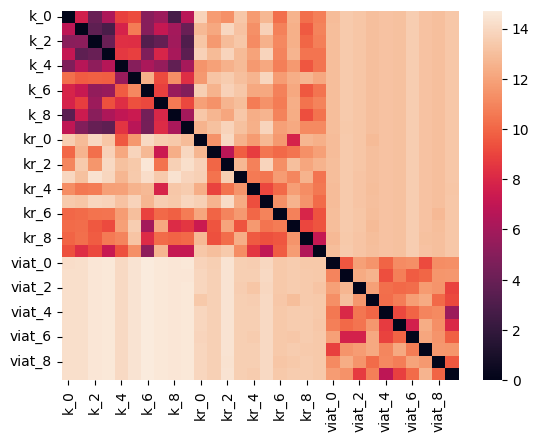

In [4]:
import seaborn as sns

sns.heatmap(comps_df)

In [10]:
from disassembly.util import amino_acids

# initialize 

exo = 0.25
parameters = {
    "endo": {aa: 1 / len(amino_acids.values()) for aa in amino_acids.values()},
    "exo": exo,
    "stop": 0.5,
}  # endo is dict of aa at p1


In [6]:
from disassembly.simulate_proteolysis import simulate_proteolysis, enzyme_set, enzyme

# Say we want to estimate parameters for K enzyme.
enzymes = enzyme_set(
    [
        enzyme({"K": 1}, "protease_iv"),
        enzyme({"K": 0.5, "R": 0.5}, "trypsin"),
        enzyme({"V": 0.5, "I": 0.25, "A": 0.15, "T": 0.1}, "elne"),
    ],
    [1, 0, 0],  # activities
    [1, 0, 0],  # abundances
)


true_dict, sequence_graph = simulate_proteolysis(
    protein,
    n_start=1,
    n_generate=n_generate,
    endo_or_exo_probability=[0.9, 0.1],
    enzymes=enzymes,
)

 499 / 500 (2388)
115 unique peptides. 501 total


In [7]:
from disassembly.util import normalize_dict
def generate_guess(parameters, protein):
    """
    Generates a guess from parameters
    """
    for aa in parameters["endo"]:
        parameters["endo"][aa] = max(0, parameters["endo"][aa])
    parameters["exo"] = max(0, parameters["exo"])
    parameters["endo"] = normalize_dict(parameters["endo"])
    parameter_enzyme = enzyme_set([enzyme(parameters["endo"], "")], [1], [1])
    guess, _ = simulate_proteolysis(
        protein,
        parameter_enzyme,
        n_start=1,
        n_generate=n_generate,
        endo_or_exo_probability=[1 - parameters["exo"], parameters["exo"]],
        verbose=False,
    )
    return guess

In [12]:
import random

lr_endo = 0.5
lr_exo = 0.05

best_losses = []
all_losses = []

starting_guess = generate_guess(parameters, protein)
p,q = compare(true_dict, starting_guess)

loss_to_beat = KL(p, q) # loss for current set of parameters

def update_parameter(parameters, aa, e, verbose=False):
    parameters["endo"][aa] += e
    new_guess = generate_guess(parameters, protein)
    p, q = compare(true_dict, new_guess)
    new_loss = KL(p, q)
    if verbose:
        print(f"\t{aa}: {new_loss:.2f} | {loss_to_beat:.2f}")
    return parameters, new_loss


for i in range(5):
    print(f"Iteration: {i}")

    for aa in parameters["endo"].keys():
        new_guess = generate_guess(parameters, protein)
        p, q = compare(true_dict, new_guess)
        new_loss = KL(p, q)
        while new_loss < loss_to_beat:
            diff = loss_to_beat - new_loss
            print(f"{aa}!!!")
            loss_to_beat = new_loss
            best_losses.append(new_loss)
            parameters, new_loss = update_parameter(parameters, aa, lr_endo*diff, verbose=True)
    

            
    exo_diff = (lr_exo * random.choice([-1,1]))
    parameters["exo"] = parameters["exo"] + exo_diff
    new_guess = generate_guess(parameters, protein)
    p, q = compare(true_dict, new_guess)
    new_loss = KL(p, q)
    all_losses.append(new_loss)
    if new_loss > loss_to_beat:
        parameters["exo"] -= exo_diff
    else:
        loss_to_beat = new_loss
        best_losses.append(new_loss)

    print(f" exo: {new_loss:.2f} | {loss_to_beat:.2f}")



Iteration: 0
	V: 12.50 | 9.38
	I: 11.98 | 9.38
	L: 11.41 | 9.38
	E: 12.87 | 9.38
	Q: 13.59 | 9.38
	D: 13.99 | 9.38
	N: 11.77 | 9.38
	H: 13.54 | 9.38
	W: 10.77 | 9.38
	F: 11.43 | 9.38
	Y: 11.13 | 9.38
	R: 13.60 | 9.38
	K: 6.91 | 9.38
K!!!
	K: 8.12 | 6.91
	S: 13.94 | 6.91
	T: 12.08 | 6.91
	M: 9.82 | 6.91
	A: 10.78 | 6.91
	G: 12.63 | 6.91
	P: 13.84 | 6.91
	C: 14.01 | 6.91
 exo: 8.35 | 6.91
Iteration: 1
	V: 10.03 | 6.91
	I: 11.43 | 6.91
	L: 13.23 | 6.91
	E: 11.79 | 6.91
	Q: 11.32 | 6.91
	D: 8.57 | 6.91
	N: 10.89 | 6.91
	H: 11.67 | 6.91
	W: 7.56 | 6.91
	F: 11.32 | 6.91
	Y: 9.03 | 6.91
	R: 11.97 | 6.91
	K: 6.23 | 6.91
K!!!
	K: 7.75 | 6.23


KeyboardInterrupt: 

<BarContainer object of 20 artists>

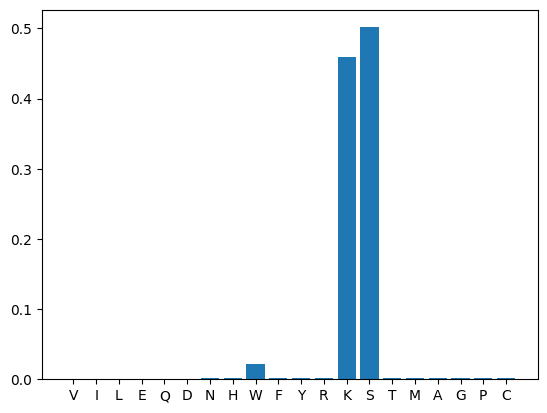

In [13]:
import matplotlib.pyplot as plt

plt.bar(parameters["endo"].keys(), parameters["endo"].values())